In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc('font',family='AppleGothic')
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

df_raw=pd.read_csv('../data/pps/train_data.csv',index_col=0)
df=df_raw.copy()

sample_submission_raw=pd.read_csv('../data/pps/test_data.csv',index_col=0)
sample_submission=sample_submission_raw.copy()

In [27]:
df.index = pd.to_datetime(df.index,format='%Y-%m-%d')
sample_submission.index = pd.to_datetime(sample_submission.index,format='%Y-%m-%d')

In [28]:
# seoul 연평균 강수일
s="""
2017,19.0,41.0,19.0,21.0,
2018,31.0,34.0,23.0,11.0,
2019,17.0,39.0,23.0,29.0,
2020,20.0,46.0,20.0,18.0,
2021,35.0,34.0,25.0,21.0
"""

In [29]:
rain = pd.DataFrame(np.array([i.strip() for i in s.split(',')]).reshape(5,5))

In [37]:
rain.columns = ['년도','3~5','6~8','9~11','12~2']
for col in rain.columns:
    rain[col] = pd.to_numeric(rain[col])

In [39]:
rain.iloc[:,1:].mean()
[24,38,22,20]

3~5     24.4
6~8     38.8
9~11    22.0
12~2    20.0
dtype: float64

In [106]:
df_2018 = df[df.index.year == 2018]
df_2019 = df[df.index.year == 2019]
df_2020 = df[df.index.year == 2020]
df_2021 = df[df.index.year == 2021]

(0.0, 7.0)

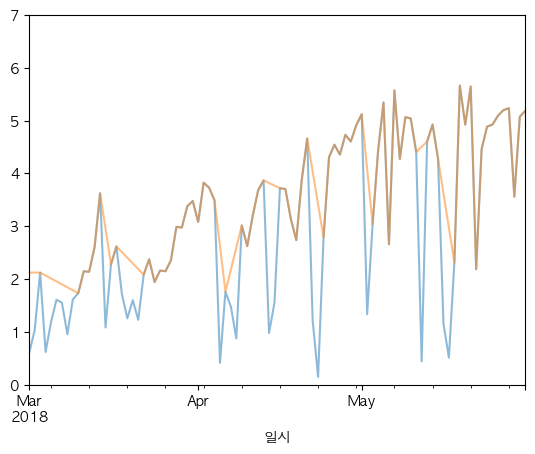

In [112]:
temp=df_2018[df_2018['월'].isin([3,4,5])]
a=temp.copy()
temp.loc[temp[temp['월'].isin([3,4,5])]['광진구'].nsmallest(24).index,'광진구'] = np.NaN
temp['광진구']=temp['광진구'].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')

a['광진구'].plot(alpha=0.5)
plt.ylim([0,7])
temp['광진구'].plot(alpha=0.5)
plt.ylim([0,7])


In [ ]:
plt.subplot(4,4,2)
a['중랑구'].plot(alpha=0.5)
plt.ylim([0,7])
temp['중랑구'].plot(alpha=0.5)
plt.ylim([0,7])

(0.0, 7.0)

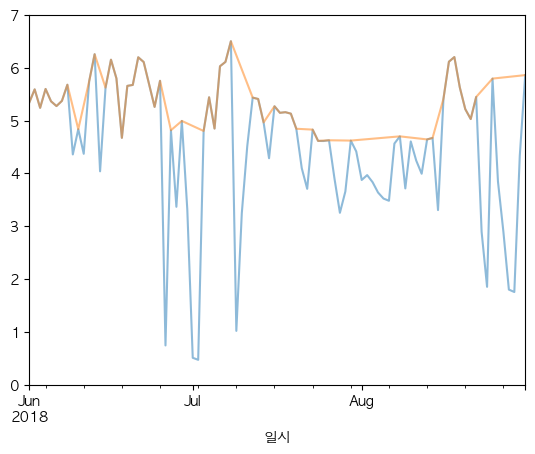

In [108]:
temp=df_2018[df_2018['월'].isin([6,7,8])]
a=temp.copy()
temp.loc[temp[temp['월'].isin([6,7,8])]['광진구'].nsmallest(38).index,'광진구'] = np.NaN
temp['광진구']=temp['광진구'].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
a['광진구'].plot(alpha=0.5)
plt.ylim([0,7])
temp['광진구'].plot(alpha=0.5)

plt.ylim([0,7])

(0.0, 10.0)

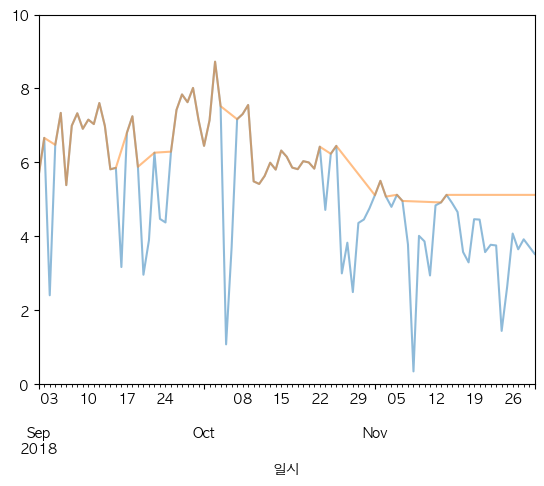

In [109]:
temp=df_2018[df_2018['월'].isin([9,10,11])]
a=temp.copy()
temp.loc[temp[temp['월'].isin([9,10,11])]['광진구'].nsmallest(38).index,'광진구'] = np.NaN
temp['광진구']=temp['광진구'].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')

a['광진구'].plot(alpha=0.5)
plt.ylim([0,10])
temp['광진구'].plot(alpha=0.5)

plt.ylim([0,10])